In [1]:
#import libraries and load data
import pandas as pd
df=pd.read_csv("C:\\Users\\User\Desktop\\dataset\\boston1.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.shape

(506, 14)

In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df_= df.loc[:,['lstat','medv']]
df_.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


# visualization of variable

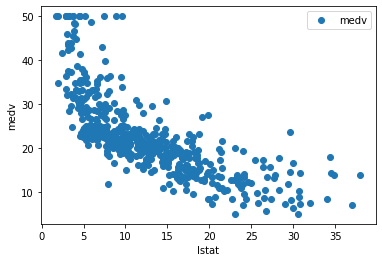

In [5]:
import matplotlib.pyplot as plt
df.plot(x='lstat',y='medv', style="o")
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

# Preparing data

In [6]:
x=pd.DataFrame(df['lstat'])
y=pd.DataFrame(df['medv'])

In [7]:
x.size,y.size

(506, 506)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [10]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(regressor.intercept_)
print(regressor.coef_)

[34.33497839]
[[-0.92441715]]


In [12]:
#making prediction
y_pred= regressor.predict(x_test)
y_pred= pd.DataFrame(y_pred, columns=["predicted"])


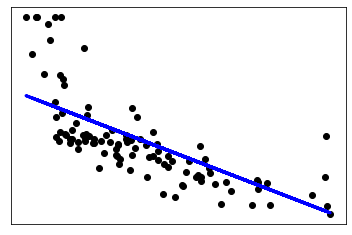

In [13]:
#plot train data output
plt.scatter(x_test, y_test, color='Black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [14]:
#Evaluating Model
import numpy as np
from sklearn import metrics
explained_variance= metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error= metrics.mean_absolute_error(y_test, y_pred)
mse= metrics.mean_squared_error(y_test, y_pred)
mean_squared_log_error= metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error= metrics.median_absolute_error(y_test, y_pred)
r2= metrics.r2_score(y_test, y_pred)
print('Explained_variance: ', round(explained_variance,2))
print('Mean_Squared_Log_Error: ', round(mean_squared_log_error,2))
print('R_Squared: ', round(r2,4))
print('Mean_Absolute_Error: ', round(mean_absolute_error,2))
print('Mean_Squared_Error: ', round(mse,2))
print('Root_Mean_Squared_Error: ', round(np.sqrt(mse),2) )


Explained_variance:  0.53
Mean_Squared_Log_Error:  0.08
R_Squared:  0.5245
Mean_Absolute_Error:  5.08
Mean_Squared_Error:  46.99
Root_Mean_Squared_Error:  6.86


In [15]:
#statistical Analysis
from statsmodels.api import OLS
import statsmodels.api as sm
#in our model, y will be dependent on two values: coefficient and constant
#so we need to add additional column in x for constant value
x= sm.add_constant(x)
summ=OLS(y, x).fit().summary()
print("Summary of the dataset: \n", summ)


Summary of the dataset: 
                             OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           5.08e-88
Time:                        09:23:08   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538     